# Identifying safe loans with decision trees

In [1]:
import numpy as np
import pandas as pd
import graphlab
import matplotlib.pyplot as plt

# Load LendingClub dataset

In [2]:
loans = graphlab.SFrame("E:\\Machine Learning\\U.W\\Classification\\lending-club-data.gl/")
loans.save("E:\\Machine Learning\\U.W\\Classification\\lending-club-data.csv", format="csv")
loans = pd.read_csv("E:\\Machine Learning\\U.W\\Classification\\lending-club-data.csv")

This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1558448651.log.0
c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


## Exploring some features

In [4]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

In [5]:
grade = loans["grade"].value_counts().reset_index()
grade.columns = ["Value", "Count"] 

grade["Percent"] = grade["Count"]/grade["Count"].sum()
grade["Count"] = grade.apply(lambda x: "{:,}".format(x["Count"]), axis=1)
grade["Percent"] = grade.apply(lambda x: "{:.3%}".format(x["Percent"]), axis=1)

In [6]:
grade

,Value,Count,Percent
0,B,"37,172",30.318%
1,C,"29,950",24.428%
2,A,"22,314",18.200%
3,D,"19,175",15.639%
4,E,"8,990",7.332%
5,F,"3,932",3.207%
6,G,"1,074",0.876%


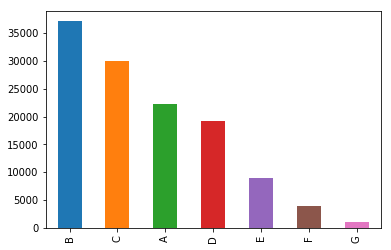

In [7]:
loans["grade"].value_counts().plot(kind="bar")

Now, let's look at a different feature.

In [8]:
ownership = loans["home_ownership"].value_counts().reset_index()
ownership.columns = ["Value", "Count"]

ownership["Percent"] = ownership["Count"]/ownership["Count"].sum()
ownership["Count"] = ownership.apply(lambda x: "{:,}".format(x["Count"]), axis=1)
ownership["Percent"] = ownership.apply(lambda x: "{:.3%}".format(x["Percent"]), axis=1)

In [9]:
ownership

,Value,Count,Percent
0,MORTGAGE,"59,240",48.317%
1,RENT,"53,245",43.427%
2,OWN,"9,943",8.110%
3,OTHER,179,0.146%


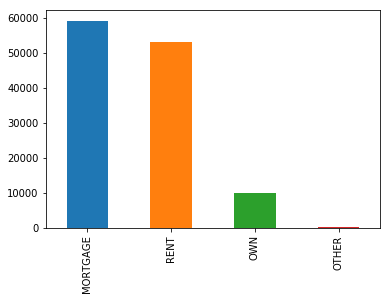

In [10]:
loans["home_ownership"].value_counts().plot(kind="bar")

## Exploring the target column

In [11]:
loans["safe_loans"] = loans["bad_loans"].apply(lambda x: +1 if x==0 else -1)
loans = loans.drop(["bad_loans"], axis=1)

In [12]:
safe_loans = loans["safe_loans"].value_counts().reset_index()
safe_loans.columns = ["Value", "Count"]

safe_loans["Percent"] = safe_loans["Count"]/safe_loans["Count"].sum()
safe_loans["Count"] = safe_loans.apply(lambda x: "{:,}".format(x["Count"]), axis=1)
safe_loans["Percent"] = safe_loans.apply(lambda x: "{:.3%}".format(x["Percent"]), axis=1)

In [13]:
safe_loans

,Value,Count,Percent
0,1,"99,457.0",81.119%
1,-1,"23,150.0",18.881%


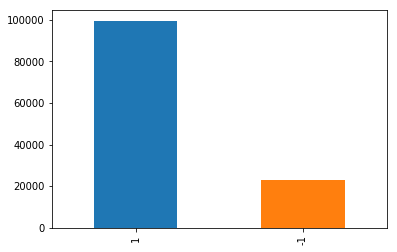

In [14]:
loans["safe_loans"].value_counts().plot(kind="bar")

## Features for the classification algorithm

In [15]:
features = ["grade", "sub_grade", "short_emp", "emp_length_num", "home_ownership", "dti", "purpose", "term", "last_delinq_none",
           "last_major_derog_none", "revol_util", "total_rec_late_fee"]

target = "safe_loans"

In [16]:
loans = loans[features + [target]]

In [17]:
loans

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.70,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.40,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.50,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.00,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.30,0.00,1
5,E,E1,0,10,RENT,5.35,car,36 months,1,1,87.50,0.00,1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.60,0.00,-1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.50,0.00,-1
8,C,C3,0,6,OWN,16.12,debt_consolidation,60 months,1,1,20.60,0.00,1
9,B,B5,0,11,OWN,10.78,debt_consolidation,36 months,1,1,67.10,0.00,1


## Sample data to balance classes

In [18]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]

print "Number of safe loans : %s" % len(safe_loans_raw)
print "Number of risky loans: %s" % len(risky_loans_raw)

Number of safe loans : 99457
Number of risky loans: 23150


In [19]:
from __future__ import division

In [20]:
safe_loans_raw_percent = len(safe_loans_raw)/len(loans)
risky_loans_raw_percent = len(risky_loans_raw)/len(loans)

print "Percentage of safe loans : ", safe_loans_raw_percent
print "Percentage of risky loans: ", risky_loans_raw_percent

Percentage of safe loans :  0.811185331996
Percentage of risky loans:  0.188814668004


In [21]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))

risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac=percentage, random_state=42)

loans_data = risky_loans.append(safe_loans)

In [22]:
print "Percentage of safe loans                :", len(safe_loans)/float(len(loans_data))
print "Percentage of risky loans               :", len(risky_loans)/float(len(loans_data))
print "Total number of loans in our new dataset:", len(loans_data)

Percentage of safe loans                : 0.5
Percentage of risky loans               : 0.5
Total number of loans in our new dataset: 46300


## Split data into training and validation sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_data, validation_data = train_test_split(loans_data, test_size=0.2, random_state=42)

In [25]:
print len(train_data)
print len(validation_data)

37040
9260


# Use decision tree to build a classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.preprocessing import LabelEncoder

f = LabelEncoder()
train_data["grade_label"] = f.fit_transform(train_data["grade"])
train_data["sub_grade_label"] = f.fit_transform(train_data["sub_grade"])
train_data["home_ownership_label"] = f.fit_transform(train_data["home_ownership"])
train_data["purpose_label"] = f.fit_transform(train_data["purpose"])
train_data["term_label"] = f.fit_transform(train_data["term"])

c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [28]:
features_label = ["grade_label", "sub_grade_label", "short_emp", "emp_length_num", "home_ownership_label", "dti", "purpose_label", 
                  "term_label", "last_delinq_none", "last_major_derog_none", "revol_util", "total_rec_late_fee"]

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
decision_tree_model = clf.fit(train_data[features_label], train_data[target])

In [30]:
decision_tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
clf_small = DecisionTreeClassifier(max_depth=2)
small_model = clf_small.fit(train_data[features_label], train_data[target])

# Making predictions

In [36]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
53330,D,D3,0,4,RENT,3.53,credit_card,36 months,1,1,84.5,0.0,1
13015,F,F3,0,7,MORTGAGE,8.33,debt_consolidation,60 months,0,1,21.3,0.0,1
35751,D,D5,0,11,OWN,2.87,major_purchase,60 months,0,1,91.9,0.0,-1
69905,E,E1,0,11,RENT,4.01,debt_consolidation,60 months,1,1,96.4,0.0,-1


## Explore label predictions

In [38]:
f = LabelEncoder()

sample_validation_data["grade_label"] = f.fit_transform(sample_validation_data["grade"])
sample_validation_data["sub_grade_label"] = f.fit_transform(sample_validation_data["sub_grade"])
sample_validation_data["home_ownership_label"] = f.fit_transform(sample_validation_data["home_ownership"])
sample_validation_data["purpose_label"] = f.fit_transform(sample_validation_data["purpose"])
sample_validation_data["term_label"] = f.fit_transform(sample_validation_data["term"])

In [39]:
sample_validation_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_label,sub_grade_label,home_ownership_label,purpose_label,term_label
53330,D,D3,0,4,RENT,3.53,credit_card,36 months,1,1,84.5,0.0,1,0,0,2,0,0
13015,F,F3,0,7,MORTGAGE,8.33,debt_consolidation,60 months,0,1,21.3,0.0,1,2,3,0,1,1
35751,D,D5,0,11,OWN,2.87,major_purchase,60 months,0,1,91.9,0.0,-1,0,1,1,2,1
69905,E,E1,0,11,RENT,4.01,debt_consolidation,60 months,1,1,96.4,0.0,-1,1,2,2,1,1


In [49]:
decision_tree_model.predict(sample_validation_data[features_label])

array([-1, -1,  1, -1], dtype=int64)

In [50]:
(sample_validation_data["safe_loans"] == decision_tree_model.predict(sample_validation_data[features_label])).sum()/float(len(sample_validation_data))

0.25

## Explore probability predictions

In [52]:
decision_tree_model.predict_proba(sample_validation_data[features_label])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [58]:
small_model.predict_proba(sample_validation_data[features_label])

array([[0.34740456, 0.65259544],
       [0.34740456, 0.65259544],
       [0.34740456, 0.65259544],
       [0.34740456, 0.65259544]])

# Evaluating accuracy of the decision tree model

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified examples}}{\mbox{# total examples}}
$$

In [80]:
small_model_true = np.array(train_data["safe_loans"])
small_model_predict = small_model.predict(train_data[features_label])

decision_tree_model_true = np.array(train_data["safe_loans"])
decision_tree_model_predict = decision_tree_model.predict(train_data[features_label])

In [83]:
from sklearn.metrics import accuracy_score

accuracy_small_model = accuracy_score(small_model_true, small_model_predict)
accuracy_decision_tree_model = accuracy_score(decision_tree_model_true, decision_tree_model_predict)

print accuracy_small_model
print accuracy_decision_tree_model

0.6224082073434125
1.0


**Decision_tree_model is way too good! Should check it later**

In [85]:
f = LabelEncoder()

validation_data["grade_label"] = f.fit_transform(validation_data["grade"])
validation_data["sub_grade_label"] = f.fit_transform(validation_data["sub_grade"])
validation_data["home_ownership_label"] = f.fit_transform(validation_data["home_ownership"])
validation_data["purpose_label"] = f.fit_transform(validation_data["purpose"])
validation_data["term_label"] = f.fit_transform(validation_data["term"])

c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [86]:
small_model_true = np.array(validation_data["safe_loans"])
small_model_predict = small_model.predict(validation_data[features_label])

decision_tree_model_true = np.array(validation_data["safe_loans"])
decision_tree_model_predict = decision_tree_model.predict(validation_data[features_label])

In [87]:
accuracy_small_model = accuracy_score(small_model_true, small_model_predict)
accuracy_decision_tree_model = accuracy_score(decision_tree_model_true, decision_tree_model_predict)

print accuracy_small_model
print accuracy_decision_tree_model

0.6257019438444924
0.5665226781857451


**Looks like decision_Tree_model is overfitting!!!**

## Evaluating accuracy of a complex decision tree model

In [88]:
clf_big = DecisionTreeClassifier(max_depth=10)
big_model = clf_big.fit(train_data[features_label], train_data[target])

In [89]:
big_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
big_model_train_true = np.array(train_data["safe_loans"])
big_model_train_predict = big_model.predict(train_data[features_label])
accuracy_big_model_train = accuracy_score(big_model_train_true, big_model_train_predict)

big_model_validation_true = np.array(validation_data["safe_loans"])
big_model_validation_predict = big_model.predict(validation_data[features_label])
accuracy_big_model_validation = accuracy_score(big_model_validation_true, big_model_validation_predict)


print accuracy_big_model_train
print accuracy_big_model_validation

0.6681965442764579
0.6271058315334773


### Quantifying the cost of mistakes

In [94]:
predictions = decision_tree_model.predict(validation_data[features_label])

In [96]:
false_positives = (validation_data[validation_data["safe_loans"] != predictions]["safe_loans"] == -1).sum()

print false_positives

2001


In [97]:
false_negatives = (validation_data[validation_data["safe_loans"] != predictions]["safe_loans"] == +1).sum()

print false_negatives

2013


In [98]:
cost_of_mistakes = (false_negatives * 10000) + (false_positives * 20000)

print cost_of_mistakes

60150000
